<a href="https://colab.research.google.com/github/KHRMNKY/Notebooks/blob/main/non-linearity-model-on-MNIST-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [40]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [41]:
train_dataset=  datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset=  datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

list(train_dataset)[0:10]

In [43]:
image, label = train_dataset[0]
image, image.shape


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [44]:
len(test_dataset)

10000

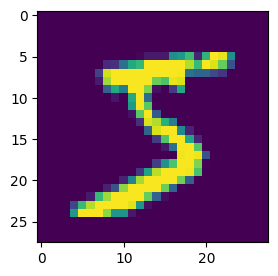

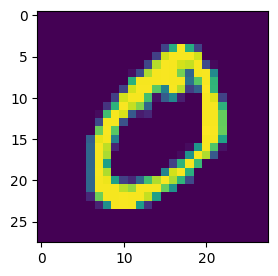

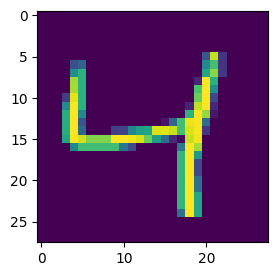

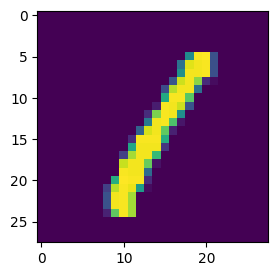

In [45]:
for img, target in list(train_dataset)[0:4]:
  plt.figure(figsize=(3,3))
  plt.imshow(img.squeeze().numpy())


In [46]:
class MNISTModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten= nn.Flatten()
    self.linear1= nn.Linear(784,128)
    self.linear2= nn.Linear(128,64)
    self.linear3= nn.Linear(64,10)


  def forward(self, x):
      x = self.flatten(x)
      x = F.relu(self.linear1(x))
      x = F.relu(self.linear2(x))
      x = self.linear3(x)
      return x

In [47]:
torch.manual_seed(42)
model0= MNISTModel().to(device)
next(model0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [48]:
import requests
url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
response = requests.get(url)


with open("helper_functions.py", "wb") as f:
  f.write(response.content)

from helper_functions import accuracy_fn

In [49]:
epochs= 100
params= model0.parameters()

lossFn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params, lr=0.1)

In [50]:

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
for epoch in range(epochs):
  print(epoch)
  train_loss=0
  for X,y_label in train_loader:
    model0.train()
    X, y_label= X.to(device), torch.tensor(y_label).to(device)
    train_pred= model0(X)
    loss=lossFn(train_pred,y_label)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_loader)

  test_loss=0
  model0.eval()
  with torch.inference_mode():
    for X, y_label in test_loader:
      X, y_label= X.to(device), torch.tensor(y_label).to(device)
      test_pred=model0(X)
      loss=lossFn(test_pred,y_label)
      test_loss += loss
      acc += accuracy_fn(y_label,test_pred.argmax(dim=1))
    acc/len(test_loader)
    test_loss /= len(test_loader)

  if epoch%2==0:

    print(f"{epoch}.epoch >>> train loss= {train_loss:5f}----test loss= {test_loss:.5f}-----accuracy= {acc:.2f}%")


0


<ipython-input-52-ac5812748b7a>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X, y_label= X.to(device), torch.tensor(y_label).to(device)
<ipython-input-52-ac5812748b7a>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X, y_label= X.to(device), torch.tensor(y_label).to(device)


0.epoch >>> train loss= 0.490865----test loss= 0.31751-----accuracy= 90.53%
1
2
2.epoch >>> train loss= 0.131046----test loss= 0.11507-----accuracy= 97.13%
3
4
4.epoch >>> train loss= 0.080294----test loss= 0.09752-----accuracy= 97.82%
5
6
6.epoch >>> train loss= 0.055209----test loss= 0.07695-----accuracy= 98.15%
7
8
8.epoch >>> train loss= 0.040627----test loss= 0.07103-----accuracy= 98.57%
9
10
10.epoch >>> train loss= 0.029574----test loss= 0.06957-----accuracy= 98.53%
11
12
12.epoch >>> train loss= 0.022120----test loss= 0.07369-----accuracy= 98.44%
13
14
14.epoch >>> train loss= 0.015183----test loss= 0.07181-----accuracy= 98.46%
15
16
16.epoch >>> train loss= 0.009975----test loss= 0.07208-----accuracy= 98.54%
17
18
18.epoch >>> train loss= 0.006970----test loss= 0.07458-----accuracy= 98.60%
19
20
20.epoch >>> train loss= 0.004826----test loss= 0.07269-----accuracy= 98.73%
21
22
22.epoch >>> train loss= 0.003098----test loss= 0.08243-----accuracy= 98.55%
23
24
24.epoch >>> train